In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


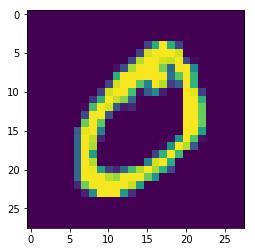

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1 )
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

In [6]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


In [7]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Data Generator mean=33.318, std=78.567


In [8]:
# normalize entire train data set
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
X_train, y_train = iterator.next()
# pixel stats in the batch
print(X_train.shape, X_train.mean(), X_train.std())

(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [9]:
# normalize entire test data set
iterator = datagen.flow(X_test, y_test, batch_size=len(X_test), shuffle=False)
X_test, y_test = iterator.next()
# pixel stats in the batch
print(X_test.shape, X_test.mean(), X_test.std())

(10000, 28, 28, 1) 0.0060174568 1.0077008


In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 24, 24, 32)        0         
__________

In [0]:
import keras.backend as K
def reg_term(lambd):
  w2 = 0
  for i in range(len(model.layers)):
    if len(model.layers[i].get_weights()) >0:
      t = np.sum(model.layers[i].get_weights()[0]*model.layers[i].get_weights()[0])
      w2=w2+t
  w2 = w2*(lambd/(2*X_train.shape[0]))
  return w2

  

def loss_l2(y_true,y_pred):
        return K.categorical_crossentropy(y_true, y_pred)+reg_term(lambd)

In [32]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

lambd = 0.01

checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
model.compile(loss=loss_l2, optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 153us/step - loss: 0.5306 - acc: 0.8516 - val_loss: 0.1408 - val_acc: 0.9713

Epoch 00001: val_loss improved from inf to 0.14079, saving model to model-001-0.851583-0.971300.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 114us/step - loss: 0.2483 - acc: 0.9280 - val_loss: 0.0796 - val_acc: 0.9818

Epoch 00002: val_loss improved from 0.14079 to 0.07956, saving model to model-002-0.928017-0.981800.h5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 115us/step - loss: 0.1985 - acc: 0.9400 - val_loss: 0.0462 - val_acc: 0.9892

Epoch 00003: val_loss improved from 0.07956 to 0.04622, saving model to model-003-0.939967-0.989200.h5
Epoch 4/40

In [33]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01905706945612328, 0.9959]


In [34]:
pred_test = model.predict(X_test).argmax(axis=-1)
pred_test

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_test)

array([[ 978,    0,    0,    0,    0,    1,    0,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1026,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   0,    0,    0,    3,    0,  888,    1,    0,    0,    0],
       [   2,    3,    0,    0,    0,    1,  952,    0,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0, 1026,    0,    0],
       [   0,    0,    1,    1,    0,    1,    0,    1,  969,    1],
       [   2,    0,    1,    0,    3,    2,    0,    2,    0,  999]])

In [37]:
incorrects = np.nonzero(pred_test.reshape((-1,)) != y_test)[0][:25]
incorrects

array([ 321,  445,  449,  659,  947, 1014, 1039, 1232, 1530, 1878, 1901,
       2035, 2130, 2135, 2293, 2462, 2597, 2648, 2654, 2939, 3422, 3448,
       4078, 4176, 4201])

In [39]:
pred_test[321] ,y_test[321]

(7, 2)

In [0]:
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()

In [0]:
for i in incorrects:
  plt.imsave("{},Pred- {},actual - {}.png".format(i,pred_test[i], y_test[i]), X_train1[i])
  